## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Кондратьев |
|---------|--------|
| Группа  | 6      |

**Вариант:** 2. Tensorflow/Keras

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

def plot(model, h, test):
    pred = model.predict(test.batch(128))
    labels = np.concatenate([y for x, y in test.batch(1000)], axis=0)
    conf_matrix = tf.math.confusion_matrix(labels, pred.argmax(axis=1))
    
    figure = plt.figure(figsize=(15, 4))
    axes = figure.add_subplot(1, 2, 1)
    plt.xticks([])
    plt.yticks([])
    matr = axes.imshow(conf_matrix)
    figure.colorbar(matr)
    axes = figure.add_subplot(1, 2, 2)
    plt.xticks(range(1, len(h.history['accuracy'])+1))
    plt.plot(h.history['accuracy'], 'k--')
    plt.plot(h.history['val_accuracy'], 'g-')
    plt.show()

## MNIST

In [3]:
(mnist_train, mnist_test), mnist_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
mnist_train = mnist_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
mnist_train = mnist_train.cache()
mnist_train = mnist_train.shuffle(mnist_info.splits['train'].num_examples)

mnist_test = mnist_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

### Однослойный персептрон

Epoch 1/10
938/938 - 10s - loss: 0.9996 - accuracy: 0.7697 - val_loss: 0.6043 - val_accuracy: 0.8653 - 10s/epoch - 11ms/step
Epoch 2/10
938/938 - 2s - loss: 0.5533 - accuracy: 0.8654 - val_loss: 0.4782 - val_accuracy: 0.8826 - 2s/epoch - 2ms/step
Epoch 3/10
938/938 - 2s - loss: 0.4729 - accuracy: 0.8796 - val_loss: 0.4274 - val_accuracy: 0.8895 - 2s/epoch - 2ms/step
Epoch 4/10
938/938 - 2s - loss: 0.4339 - accuracy: 0.8859 - val_loss: 0.3990 - val_accuracy: 0.8966 - 2s/epoch - 2ms/step
Epoch 5/10
938/938 - 2s - loss: 0.4098 - accuracy: 0.8905 - val_loss: 0.3799 - val_accuracy: 0.8990 - 2s/epoch - 3ms/step
Epoch 6/10
938/938 - 2s - loss: 0.3929 - accuracy: 0.8938 - val_loss: 0.3662 - val_accuracy: 0.9029 - 2s/epoch - 2ms/step
Epoch 7/10
938/938 - 2s - loss: 0.3803 - accuracy: 0.8965 - val_loss: 0.3565 - val_accuracy: 0.9052 - 2s/epoch - 2ms/step
Epoch 8/10
938/938 - 2s - loss: 0.3703 - accuracy: 0.8989 - val_loss: 0.3477 - val_accuracy: 0.9063 - 2s/epoch - 2ms/step
Epoch 9/10
938/938 - 

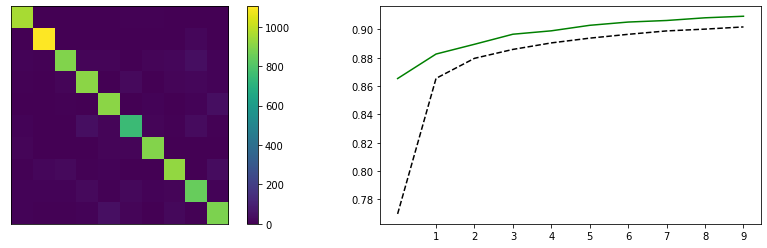

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])

model.compile('sgd', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(64), epochs = 10, validation_data = mnist_test.batch(64), verbose = 2)
plot(model, h, mnist_test)

Adam показывает лучший результат. 93% по всей видимости является пределом для однослойной модели

Epoch 1/10
938/938 - 2s - loss: 0.5520 - accuracy: 0.8602 - val_loss: 0.3330 - val_accuracy: 0.9112 - 2s/epoch - 2ms/step
Epoch 2/10
938/938 - 2s - loss: 0.3241 - accuracy: 0.9107 - val_loss: 0.2952 - val_accuracy: 0.9195 - 2s/epoch - 2ms/step
Epoch 3/10
938/938 - 2s - loss: 0.2961 - accuracy: 0.9174 - val_loss: 0.2813 - val_accuracy: 0.9227 - 2s/epoch - 2ms/step
Epoch 4/10
938/938 - 2s - loss: 0.2827 - accuracy: 0.9212 - val_loss: 0.2736 - val_accuracy: 0.9227 - 2s/epoch - 2ms/step
Epoch 5/10
938/938 - 1s - loss: 0.2743 - accuracy: 0.9231 - val_loss: 0.2717 - val_accuracy: 0.9266 - 1s/epoch - 1ms/step
Epoch 6/10
938/938 - 2s - loss: 0.2686 - accuracy: 0.9255 - val_loss: 0.2699 - val_accuracy: 0.9259 - 2s/epoch - 2ms/step
Epoch 7/10
938/938 - 1s - loss: 0.2643 - accuracy: 0.9265 - val_loss: 0.2675 - val_accuracy: 0.9248 - 1s/epoch - 2ms/step
Epoch 8/10
938/938 - 2s - loss: 0.2609 - accuracy: 0.9278 - val_loss: 0.2647 - val_accuracy: 0.9258 - 2s/epoch - 2ms/step
Epoch 9/10
938/938 - 2s 

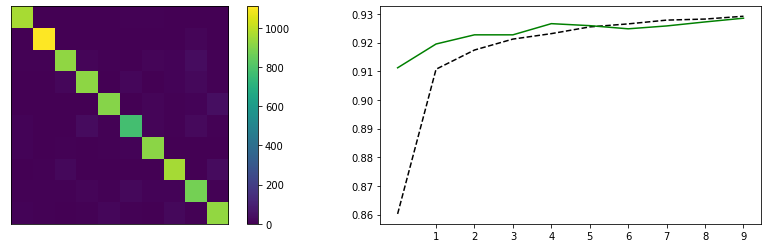

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.001), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(64), epochs = 10, validation_data = mnist_test.batch(64), verbose = 2)
plot(model, h, mnist_test)

### Многослойный персептрон

Двухслойный персептрон достигает точности 97-98%. Такого результата можно добиться несколькими способами

Epoch 1/10
469/469 - 2s - loss: 0.3184 - accuracy: 0.9061 - val_loss: 0.1712 - val_accuracy: 0.9468 - 2s/epoch - 4ms/step
Epoch 2/10
469/469 - 1s - loss: 0.1428 - accuracy: 0.9585 - val_loss: 0.1091 - val_accuracy: 0.9674 - 1s/epoch - 3ms/step
Epoch 3/10
469/469 - 1s - loss: 0.0986 - accuracy: 0.9708 - val_loss: 0.0919 - val_accuracy: 0.9722 - 1s/epoch - 3ms/step
Epoch 4/10
469/469 - 2s - loss: 0.0764 - accuracy: 0.9773 - val_loss: 0.0893 - val_accuracy: 0.9722 - 2s/epoch - 4ms/step
Epoch 5/10
469/469 - 1s - loss: 0.0613 - accuracy: 0.9822 - val_loss: 0.0763 - val_accuracy: 0.9759 - 1s/epoch - 3ms/step
Epoch 6/10
469/469 - 1s - loss: 0.0505 - accuracy: 0.9853 - val_loss: 0.0784 - val_accuracy: 0.9751 - 1s/epoch - 3ms/step
Epoch 7/10
469/469 - 2s - loss: 0.0426 - accuracy: 0.9875 - val_loss: 0.0715 - val_accuracy: 0.9781 - 2s/epoch - 3ms/step
Epoch 8/10
469/469 - 1s - loss: 0.0360 - accuracy: 0.9896 - val_loss: 0.0686 - val_accuracy: 0.9792 - 1s/epoch - 3ms/step
Epoch 9/10
469/469 - 1s 

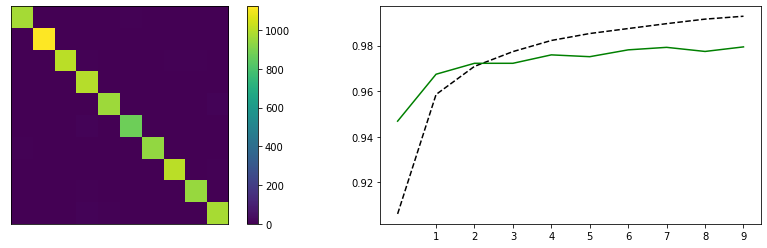

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.SGD(0.05, 0.9), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

Epoch 1/10
469/469 - 2s - loss: 0.4646 - accuracy: 0.8758 - val_loss: 0.2446 - val_accuracy: 0.9324 - 2s/epoch - 4ms/step
Epoch 2/10
469/469 - 1s - loss: 0.2182 - accuracy: 0.9397 - val_loss: 0.1852 - val_accuracy: 0.9478 - 1s/epoch - 3ms/step
Epoch 3/10
469/469 - 1s - loss: 0.1690 - accuracy: 0.9527 - val_loss: 0.1533 - val_accuracy: 0.9555 - 1s/epoch - 3ms/step
Epoch 4/10
469/469 - 1s - loss: 0.1382 - accuracy: 0.9610 - val_loss: 0.1279 - val_accuracy: 0.9632 - 1s/epoch - 3ms/step
Epoch 5/10
469/469 - 1s - loss: 0.1162 - accuracy: 0.9673 - val_loss: 0.1132 - val_accuracy: 0.9676 - 1s/epoch - 3ms/step
Epoch 6/10
469/469 - 2s - loss: 0.0999 - accuracy: 0.9717 - val_loss: 0.1056 - val_accuracy: 0.9690 - 2s/epoch - 4ms/step
Epoch 7/10
469/469 - 1s - loss: 0.0869 - accuracy: 0.9757 - val_loss: 0.0978 - val_accuracy: 0.9715 - 1s/epoch - 3ms/step
Epoch 8/10
469/469 - 1s - loss: 0.0756 - accuracy: 0.9790 - val_loss: 0.0937 - val_accuracy: 0.9728 - 1s/epoch - 3ms/step
Epoch 9/10
469/469 - 2s 

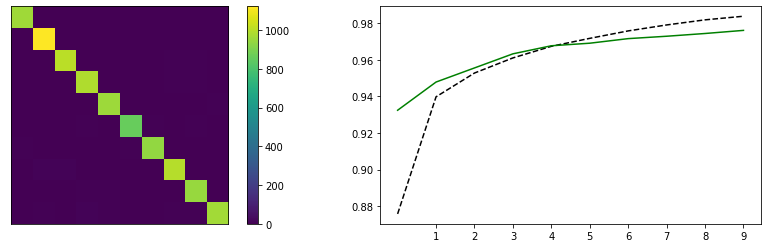

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.0005), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

Epoch 1/10
469/469 - 2s - loss: 0.5276 - accuracy: 0.8729 - val_loss: 0.2802 - val_accuracy: 0.9209 - 2s/epoch - 4ms/step
Epoch 2/10
469/469 - 1s - loss: 0.2503 - accuracy: 0.9285 - val_loss: 0.2214 - val_accuracy: 0.9357 - 1s/epoch - 3ms/step
Epoch 3/10
469/469 - 2s - loss: 0.2008 - accuracy: 0.9423 - val_loss: 0.1796 - val_accuracy: 0.9470 - 2s/epoch - 3ms/step
Epoch 4/10
469/469 - 1s - loss: 0.1685 - accuracy: 0.9506 - val_loss: 0.1583 - val_accuracy: 0.9530 - 1s/epoch - 3ms/step
Epoch 5/10
469/469 - 1s - loss: 0.1450 - accuracy: 0.9576 - val_loss: 0.1385 - val_accuracy: 0.9591 - 1s/epoch - 3ms/step
Epoch 6/10
469/469 - 1s - loss: 0.1265 - accuracy: 0.9636 - val_loss: 0.1280 - val_accuracy: 0.9617 - 1s/epoch - 3ms/step
Epoch 7/10
469/469 - 2s - loss: 0.1123 - accuracy: 0.9673 - val_loss: 0.1184 - val_accuracy: 0.9641 - 2s/epoch - 3ms/step
Epoch 8/10
469/469 - 1s - loss: 0.1002 - accuracy: 0.9711 - val_loss: 0.1104 - val_accuracy: 0.9668 - 1s/epoch - 3ms/step
Epoch 9/10
469/469 - 1s 

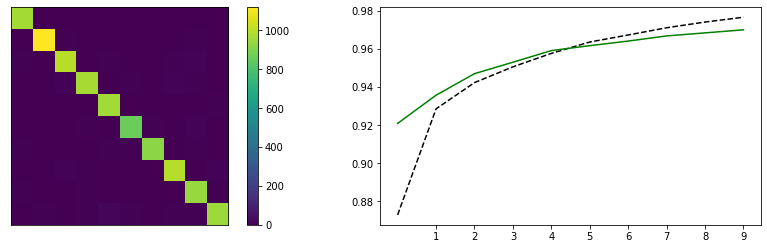

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

model.compile('rmsprop', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

Увеличение числа слоев не дает значительного прироста точности.

Epoch 1/10
469/469 - 2s - loss: 0.2975 - accuracy: 0.9118 - val_loss: 0.1649 - val_accuracy: 0.9511 - 2s/epoch - 5ms/step
Epoch 2/10
469/469 - 2s - loss: 0.1361 - accuracy: 0.9591 - val_loss: 0.1096 - val_accuracy: 0.9650 - 2s/epoch - 5ms/step
Epoch 3/10
469/469 - 2s - loss: 0.0925 - accuracy: 0.9720 - val_loss: 0.0978 - val_accuracy: 0.9702 - 2s/epoch - 4ms/step
Epoch 4/10
469/469 - 2s - loss: 0.0718 - accuracy: 0.9778 - val_loss: 0.0884 - val_accuracy: 0.9720 - 2s/epoch - 4ms/step
Epoch 5/10
469/469 - 2s - loss: 0.0555 - accuracy: 0.9826 - val_loss: 0.0781 - val_accuracy: 0.9767 - 2s/epoch - 4ms/step
Epoch 6/10
469/469 - 2s - loss: 0.0435 - accuracy: 0.9859 - val_loss: 0.0709 - val_accuracy: 0.9777 - 2s/epoch - 4ms/step
Epoch 7/10
469/469 - 2s - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.0829 - val_accuracy: 0.9743 - 2s/epoch - 4ms/step
Epoch 8/10
469/469 - 2s - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0697 - val_accuracy: 0.9788 - 2s/epoch - 5ms/step
Epoch 9/10
469/469 - 2s 

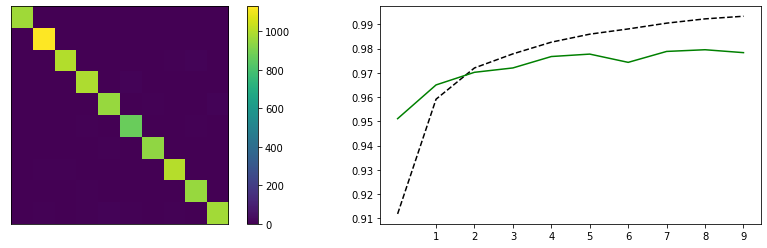

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.001), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

Epoch 1/10
469/469 - 2s - loss: 0.4163 - accuracy: 0.8858 - val_loss: 0.2419 - val_accuracy: 0.9311 - 2s/epoch - 5ms/step
Epoch 2/10
469/469 - 2s - loss: 0.2075 - accuracy: 0.9402 - val_loss: 0.1749 - val_accuracy: 0.9486 - 2s/epoch - 4ms/step
Epoch 3/10
469/469 - 2s - loss: 0.1567 - accuracy: 0.9551 - val_loss: 0.1423 - val_accuracy: 0.9568 - 2s/epoch - 4ms/step
Epoch 4/10
469/469 - 2s - loss: 0.1261 - accuracy: 0.9638 - val_loss: 0.1204 - val_accuracy: 0.9633 - 2s/epoch - 5ms/step
Epoch 5/10
469/469 - 2s - loss: 0.1060 - accuracy: 0.9696 - val_loss: 0.1098 - val_accuracy: 0.9672 - 2s/epoch - 4ms/step
Epoch 6/10
469/469 - 2s - loss: 0.0906 - accuracy: 0.9743 - val_loss: 0.1011 - val_accuracy: 0.9684 - 2s/epoch - 4ms/step
Epoch 7/10
469/469 - 2s - loss: 0.0788 - accuracy: 0.9779 - val_loss: 0.0886 - val_accuracy: 0.9719 - 2s/epoch - 5ms/step
Epoch 8/10
469/469 - 2s - loss: 0.0692 - accuracy: 0.9799 - val_loss: 0.0829 - val_accuracy: 0.9742 - 2s/epoch - 5ms/step
Epoch 9/10
469/469 - 2s 

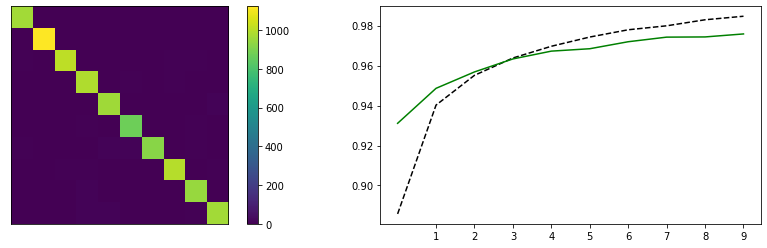

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adagrad(0.03), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

## FashionMNIST

In [12]:
(fmnist_train, fmnist_test), fmnist_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete8S3NTQ/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete8S3NTQ/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [13]:
fmnist_train = fmnist_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
fmnist_train = fmnist_train.cache()
fmnist_train = fmnist_train.shuffle(fmnist_info.splits['train'].num_examples)

fmnist_test = fmnist_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

Точность однослойной модели - 84%

Epoch 1/10
469/469 - 5s - loss: 0.7001 - accuracy: 0.7659 - val_loss: 0.5884 - val_accuracy: 0.7979 - 5s/epoch - 12ms/step
Epoch 2/10
469/469 - 1s - loss: 0.5187 - accuracy: 0.8262 - val_loss: 0.5253 - val_accuracy: 0.8174 - 967ms/epoch - 2ms/step
Epoch 3/10
469/469 - 1s - loss: 0.4838 - accuracy: 0.8361 - val_loss: 0.5003 - val_accuracy: 0.8275 - 952ms/epoch - 2ms/step
Epoch 4/10
469/469 - 1s - loss: 0.4645 - accuracy: 0.8431 - val_loss: 0.4878 - val_accuracy: 0.8316 - 943ms/epoch - 2ms/step
Epoch 5/10
469/469 - 1s - loss: 0.4541 - accuracy: 0.8452 - val_loss: 0.4799 - val_accuracy: 0.8326 - 956ms/epoch - 2ms/step
Epoch 6/10
469/469 - 1s - loss: 0.4444 - accuracy: 0.8495 - val_loss: 0.4853 - val_accuracy: 0.8327 - 953ms/epoch - 2ms/step
Epoch 7/10
469/469 - 1s - loss: 0.4380 - accuracy: 0.8504 - val_loss: 0.4666 - val_accuracy: 0.8355 - 925ms/epoch - 2ms/step
Epoch 8/10
469/469 - 1s - loss: 0.4330 - accuracy: 0.8521 - val_loss: 0.4634 - val_accuracy: 0.8385 - 941ms/epoch - 2ms/step
Ep

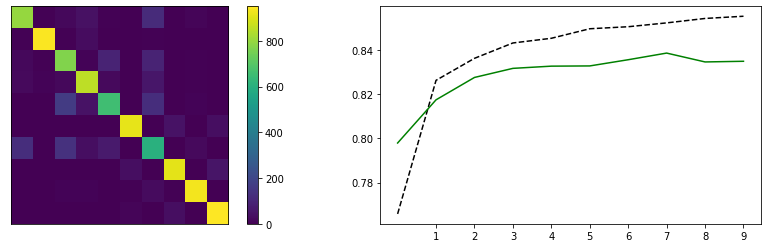

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.SGD(0.01, 0.9), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(fmnist_train.batch(128), epochs = 10, validation_data = fmnist_test.batch(128), verbose = 2)
plot(model, h, fmnist_test)

Epoch 1/10
469/469 - 1s - loss: 0.7358 - accuracy: 0.7567 - val_loss: 0.5802 - val_accuracy: 0.8021 - 1s/epoch - 3ms/step
Epoch 2/10
469/469 - 1s - loss: 0.5146 - accuracy: 0.8281 - val_loss: 0.5170 - val_accuracy: 0.8269 - 1s/epoch - 2ms/step
Epoch 3/10
469/469 - 1s - loss: 0.4742 - accuracy: 0.8407 - val_loss: 0.5080 - val_accuracy: 0.8274 - 999ms/epoch - 2ms/step
Epoch 4/10
469/469 - 1s - loss: 0.4516 - accuracy: 0.8479 - val_loss: 0.4850 - val_accuracy: 0.8328 - 1s/epoch - 2ms/step
Epoch 5/10
469/469 - 1s - loss: 0.4385 - accuracy: 0.8503 - val_loss: 0.4670 - val_accuracy: 0.8387 - 999ms/epoch - 2ms/step
Epoch 6/10
469/469 - 1s - loss: 0.4274 - accuracy: 0.8540 - val_loss: 0.4616 - val_accuracy: 0.8385 - 991ms/epoch - 2ms/step
Epoch 7/10
469/469 - 1s - loss: 0.4210 - accuracy: 0.8560 - val_loss: 0.4612 - val_accuracy: 0.8378 - 1s/epoch - 2ms/step
Epoch 8/10
469/469 - 1s - loss: 0.4141 - accuracy: 0.8590 - val_loss: 0.4543 - val_accuracy: 0.8421 - 1s/epoch - 2ms/step
Epoch 9/10
469/

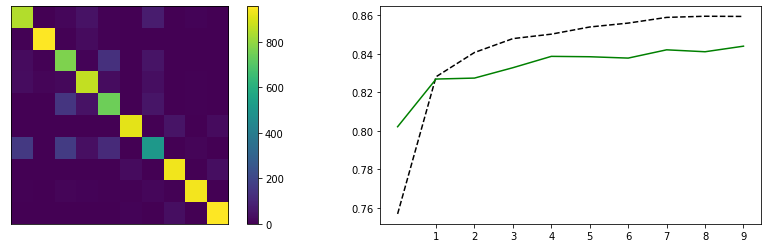

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(fmnist_train.batch(128), epochs = 10, validation_data = fmnist_test.batch(128), verbose = 2)
plot(model, h, fmnist_test)

Многослойной - 88%

Epoch 1/10
235/235 - 2s - loss: 0.5993 - accuracy: 0.7986 - val_loss: 0.4781 - val_accuracy: 0.8386 - 2s/epoch - 9ms/step
Epoch 2/10
235/235 - 2s - loss: 0.4220 - accuracy: 0.8544 - val_loss: 0.4543 - val_accuracy: 0.8373 - 2s/epoch - 9ms/step
Epoch 3/10
235/235 - 2s - loss: 0.3805 - accuracy: 0.8675 - val_loss: 0.4148 - val_accuracy: 0.8536 - 2s/epoch - 9ms/step
Epoch 4/10
235/235 - 2s - loss: 0.3550 - accuracy: 0.8757 - val_loss: 0.4238 - val_accuracy: 0.8478 - 2s/epoch - 8ms/step
Epoch 5/10
235/235 - 2s - loss: 0.3363 - accuracy: 0.8806 - val_loss: 0.3730 - val_accuracy: 0.8657 - 2s/epoch - 9ms/step
Epoch 6/10
235/235 - 2s - loss: 0.3181 - accuracy: 0.8869 - val_loss: 0.3682 - val_accuracy: 0.8676 - 2s/epoch - 8ms/step
Epoch 7/10
235/235 - 2s - loss: 0.3067 - accuracy: 0.8899 - val_loss: 0.3707 - val_accuracy: 0.8697 - 2s/epoch - 8ms/step
Epoch 8/10
235/235 - 2s - loss: 0.2955 - accuracy: 0.8942 - val_loss: 0.3570 - val_accuracy: 0.8701 - 2s/epoch - 8ms/step
Epoch 9/10
235/235 - 2s 

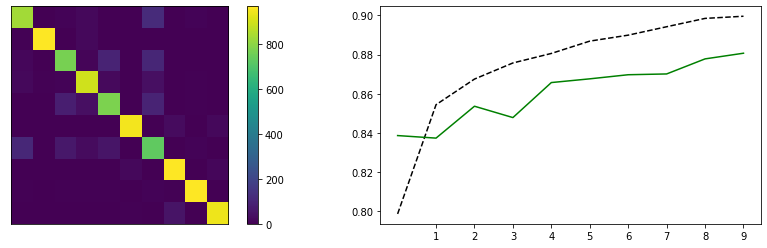

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.0005), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(fmnist_train.batch(256), epochs = 10, validation_data = fmnist_test.batch(256), verbose = 2)
plot(model, h, fmnist_test)

Epoch 1/10
235/235 - 3s - loss: 0.6914 - accuracy: 0.7731 - val_loss: 0.4852 - val_accuracy: 0.8323 - 3s/epoch - 12ms/step
Epoch 2/10
235/235 - 3s - loss: 0.4300 - accuracy: 0.8515 - val_loss: 0.4338 - val_accuracy: 0.8483 - 3s/epoch - 11ms/step
Epoch 3/10
235/235 - 3s - loss: 0.3869 - accuracy: 0.8645 - val_loss: 0.3999 - val_accuracy: 0.8582 - 3s/epoch - 11ms/step
Epoch 4/10
235/235 - 3s - loss: 0.3573 - accuracy: 0.8743 - val_loss: 0.3887 - val_accuracy: 0.8634 - 3s/epoch - 11ms/step
Epoch 5/10
235/235 - 3s - loss: 0.3371 - accuracy: 0.8797 - val_loss: 0.3704 - val_accuracy: 0.8676 - 3s/epoch - 11ms/step
Epoch 6/10
235/235 - 3s - loss: 0.3223 - accuracy: 0.8855 - val_loss: 0.3696 - val_accuracy: 0.8689 - 3s/epoch - 11ms/step
Epoch 7/10
235/235 - 3s - loss: 0.3099 - accuracy: 0.8882 - val_loss: 0.3600 - val_accuracy: 0.8705 - 3s/epoch - 11ms/step
Epoch 8/10
235/235 - 2s - loss: 0.2962 - accuracy: 0.8933 - val_loss: 0.3597 - val_accuracy: 0.8704 - 2s/epoch - 10ms/step
Epoch 9/10
235/2

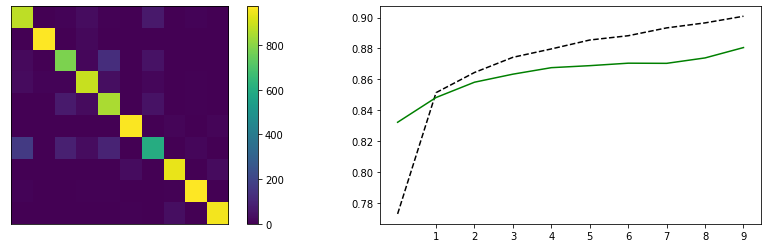

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.0002), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(fmnist_train.batch(256), epochs = 10, validation_data = fmnist_test.batch(256), verbose = 2)
plot(model, h, fmnist_test)

## CIFAR-10

In [18]:
(cifar_train, cifar_test), cifar_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incomplete0W4PJA/cifar10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incomplete0W4PJA/cifar10-test.tfrecord*...:   0%|          | 0/1…

Dataset cifar10 downloaded and prepared to ~/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [19]:
cifar_train = cifar_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
cifar_train = cifar_train.cache()
cifar_train = cifar_train.shuffle(cifar_info.splits['train'].num_examples)

cifar_test = cifar_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

CIFAR-10 сложнее для распознавания линейными слоями

Epoch 1/10
391/391 - 11s - loss: 1.8819 - accuracy: 0.3319 - val_loss: 1.7380 - val_accuracy: 0.3884 - 11s/epoch - 28ms/step
Epoch 2/10
391/391 - 4s - loss: 1.6993 - accuracy: 0.4010 - val_loss: 1.7028 - val_accuracy: 0.3957 - 4s/epoch - 10ms/step
Epoch 3/10
391/391 - 4s - loss: 1.6332 - accuracy: 0.4247 - val_loss: 1.6119 - val_accuracy: 0.4287 - 4s/epoch - 10ms/step
Epoch 4/10
391/391 - 4s - loss: 1.5811 - accuracy: 0.4418 - val_loss: 1.6052 - val_accuracy: 0.4340 - 4s/epoch - 10ms/step
Epoch 5/10
391/391 - 5s - loss: 1.5385 - accuracy: 0.4588 - val_loss: 1.5450 - val_accuracy: 0.4505 - 5s/epoch - 12ms/step
Epoch 6/10
391/391 - 4s - loss: 1.5180 - accuracy: 0.4625 - val_loss: 1.5390 - val_accuracy: 0.4536 - 4s/epoch - 10ms/step
Epoch 7/10
391/391 - 4s - loss: 1.4858 - accuracy: 0.4728 - val_loss: 1.5108 - val_accuracy: 0.4697 - 4s/epoch - 10ms/step
Epoch 8/10
391/391 - 4s - loss: 1.4631 - accuracy: 0.4838 - val_loss: 1.5245 - val_accuracy: 0.4527 - 4s/epoch - 10ms/step
Epoch 9/10
391

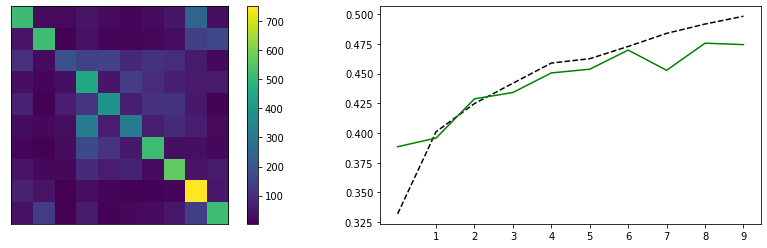

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(cifar_train.batch(128), epochs = 10, validation_data = cifar_test.batch(128), verbose = 2)
plot(model, h, cifar_test)

Несколько помогает увеличение размеров слоев и их количества. Наилучший реультат - 50%

Epoch 1/10
391/391 - 12s - loss: 2.0286 - accuracy: 0.3145 - val_loss: 1.8329 - val_accuracy: 0.3477 - 12s/epoch - 30ms/step
Epoch 2/10
391/391 - 11s - loss: 1.7137 - accuracy: 0.3951 - val_loss: 1.6575 - val_accuracy: 0.4130 - 11s/epoch - 29ms/step
Epoch 3/10
391/391 - 11s - loss: 1.6331 - accuracy: 0.4201 - val_loss: 1.5933 - val_accuracy: 0.4409 - 11s/epoch - 29ms/step
Epoch 4/10
391/391 - 12s - loss: 1.5741 - accuracy: 0.4445 - val_loss: 1.6137 - val_accuracy: 0.4155 - 12s/epoch - 30ms/step
Epoch 5/10
391/391 - 11s - loss: 1.5441 - accuracy: 0.4535 - val_loss: 1.5184 - val_accuracy: 0.4617 - 11s/epoch - 29ms/step
Epoch 6/10
391/391 - 11s - loss: 1.5071 - accuracy: 0.4686 - val_loss: 1.5060 - val_accuracy: 0.4692 - 11s/epoch - 29ms/step
Epoch 7/10
391/391 - 11s - loss: 1.4846 - accuracy: 0.4753 - val_loss: 1.5095 - val_accuracy: 0.4605 - 11s/epoch - 29ms/step
Epoch 8/10
391/391 - 11s - loss: 1.4549 - accuracy: 0.4872 - val_loss: 1.5076 - val_accuracy: 0.4589 - 11s/epoch - 29ms/step


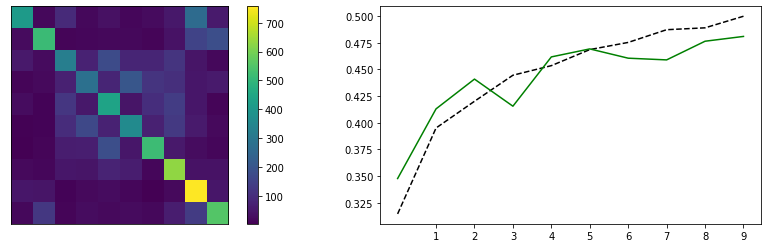

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(cifar_train.batch(128), epochs = 10, validation_data = cifar_test.batch(128), verbose = 2)
plot(model, h, cifar_test)

Epoch 1/10
391/391 - 14s - loss: 1.9496 - accuracy: 0.3143 - val_loss: 1.7070 - val_accuracy: 0.3834 - 14s/epoch - 36ms/step
Epoch 2/10
391/391 - 14s - loss: 1.6753 - accuracy: 0.4008 - val_loss: 1.6099 - val_accuracy: 0.4286 - 14s/epoch - 36ms/step
Epoch 3/10
391/391 - 14s - loss: 1.5781 - accuracy: 0.4367 - val_loss: 1.5503 - val_accuracy: 0.4502 - 14s/epoch - 36ms/step
Epoch 4/10
391/391 - 14s - loss: 1.5222 - accuracy: 0.4565 - val_loss: 1.4885 - val_accuracy: 0.4700 - 14s/epoch - 35ms/step
Epoch 5/10
391/391 - 14s - loss: 1.4851 - accuracy: 0.4720 - val_loss: 1.5427 - val_accuracy: 0.4509 - 14s/epoch - 35ms/step
Epoch 6/10
391/391 - 14s - loss: 1.4464 - accuracy: 0.4813 - val_loss: 1.4765 - val_accuracy: 0.4756 - 14s/epoch - 37ms/step
Epoch 7/10
391/391 - 14s - loss: 1.4058 - accuracy: 0.4988 - val_loss: 1.4354 - val_accuracy: 0.4897 - 14s/epoch - 35ms/step
Epoch 8/10
391/391 - 14s - loss: 1.3731 - accuracy: 0.5103 - val_loss: 1.4666 - val_accuracy: 0.4833 - 14s/epoch - 35ms/step


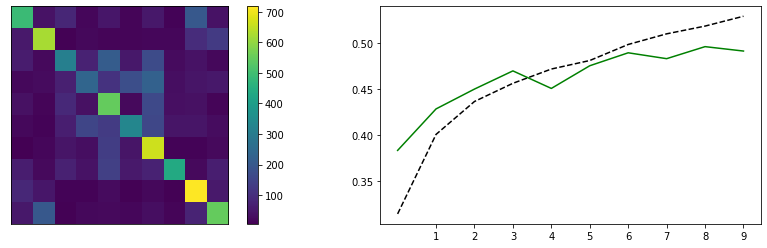

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(cifar_train.batch(128), epochs = 10, validation_data = cifar_test.batch(128), verbose = 2)
plot(model, h, cifar_test)

Epoch 1/10
391/391 - 15s - loss: 1.9038 - accuracy: 0.3143 - val_loss: 1.7472 - val_accuracy: 0.3746 - 15s/epoch - 40ms/step
Epoch 2/10
391/391 - 14s - loss: 1.6685 - accuracy: 0.4002 - val_loss: 1.6195 - val_accuracy: 0.4196 - 14s/epoch - 37ms/step
Epoch 3/10
391/391 - 14s - loss: 1.5770 - accuracy: 0.4352 - val_loss: 1.5381 - val_accuracy: 0.4462 - 14s/epoch - 37ms/step
Epoch 4/10
391/391 - 15s - loss: 1.5158 - accuracy: 0.4583 - val_loss: 1.4930 - val_accuracy: 0.4679 - 15s/epoch - 37ms/step
Epoch 5/10
391/391 - 15s - loss: 1.4734 - accuracy: 0.4714 - val_loss: 1.4791 - val_accuracy: 0.4727 - 15s/epoch - 38ms/step
Epoch 6/10
391/391 - 14s - loss: 1.4223 - accuracy: 0.4910 - val_loss: 1.4598 - val_accuracy: 0.4791 - 14s/epoch - 37ms/step
Epoch 7/10
391/391 - 14s - loss: 1.3917 - accuracy: 0.5007 - val_loss: 1.4182 - val_accuracy: 0.4964 - 14s/epoch - 37ms/step
Epoch 8/10
391/391 - 15s - loss: 1.3683 - accuracy: 0.5085 - val_loss: 1.4703 - val_accuracy: 0.4731 - 15s/epoch - 38ms/step


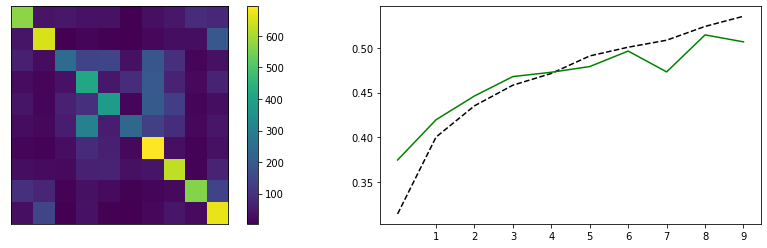

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(cifar_train.batch(128), epochs = 10, validation_data = cifar_test.batch(128), verbose = 2)
plot(model, h, cifar_test)